
# Naives Bayes Classifier



## Objectives

- Understand the Naives Bayes algorithm via implementation using Python
- Application of Naives Bayes algorithm for classification
- Application of Naives Bayes algorithm on text processing in tokenization and term frequency


## Introduction
This practical illustrates the concept of Naives Bayes' algorithm. We will see how it can be applied in the field of natural language processing. Specifically, we will use it to classify news articles according to topics.

Note that the focus of this practical is not on natual language processing, we will not be performing the full text pre-processing tasks like removal of stop-words and lemmatization.

```CountVectorizer``` provided by Scikit-Learn can be used to process text data into tokens (words) and helps to count words (term frequency). See URL for more information:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html.


## Step 1

Import <code>Pandas</code> and <code>CountVectorizer</code> from <code>sklearn.feature_extraction.text</code>


In [1]:
#Enter the import statements here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

## Step 2
Our example uses some headline news for illustrative purposes, the first 3 texts are various title of local news related to HDB flats.

See below for a screenshot of the news headline:

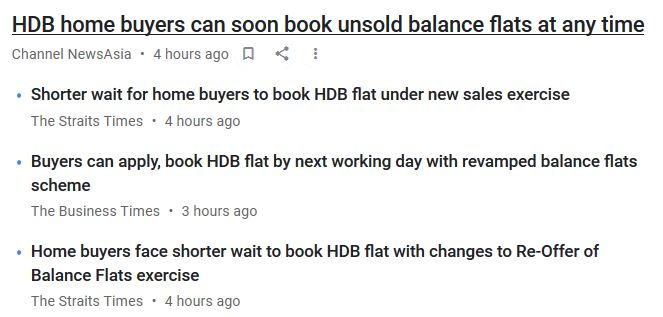

We will also add three news headlines on other news for illustrative purposes.

During testing, we will use unseen news headlines as test data to see if Bayes classifier can properly classify them.

The codes to create a _Pandas_ ```DataFrame``` has already been entered for you. Note that the DataFrame has two columns (Text and Class). The class column indicates whether the corresponding news headline is a news on recent change (as of this writing) in HDB application rules. Value of 1 = *yes* and value of 0 = *no*.

You may wish to print out the training data frame to see the data set:

```python
print(training)
```

In [2]:
training = pd.DataFrame({
    "Text": [
        "HDB home buyers can soon book unsold balance flats at any time", 
        "buyers can apply book HDB flat by next working day with revamped balance flats scheme",
        "home buyers face shorter wait to book HDB with changes to re-offer of balance flats exercise",
        "online ads lure drivers to cigarette smuggling 25 caught",
        "cashew road fire caused by e-scooter man broke bedroom window to free his trapped sons",
        "gojek driver in viral video says he didnt ask for donations warns people about being cheated"
    ], 
    "Class":[
        1,
        1,
        1,
        0,
        0,
        0
    ]
})

## Step 3

Before we can use the Naive Bayes classifier, we will need to process the raw text. The process includes breaking the text into individual words (tokenization), counting the number of words in each text as well as the frequency of each word.

We will first define a function named <code>get_bag_of_words</code> with a single parameter <code>text</code>. The function will generate a list of words contained in the text provided:

In [4]:
#Enter definition of function get_bag_of_words(text) here

def get_bag_of_words(text):
    #default token_pattern= u'(?u)\\b\\w\\w+\\b' which removes single-character words
    vectorizer = CountVectorizer(token_pattern='\\b\\w+\\b')
    vectorizer.fit_transform(text)
    #feature_names = columns = all individual words
    fn = vectorizer.get_feature_names()
    return fn
get_bag_of_words(pd.Series(["this is a testing string"]))

['a', 'is', 'string', 'testing', 'this']

## Step 4
We will next define a function called ```get_word_frequency(text)``` that will count the number of individual words in a text.


In [5]:
#Define the function get_word_frequency(text) here

def get_word_frequency(text):
    vectorizer = CountVectorizer(token_pattern='\\b\\w+\\b')
    model = vectorizer.fit_transform(text)
    #convert into a dictionary associating a word and its frequency (count)
    return dict(zip(vectorizer.get_feature_names(), model.toarray().sum(axis=0)))

get_word_frequency(pd.Series(["testing testing A A A B C"]))


{'a': 3, 'b': 1, 'c': 1, 'testing': 2}

## Step 5
We will next define a function called <code>get_word_count(text)</code> that will count the number of _unqiue_ words in a text.


In [6]:
#Define the function get_word_count(text) here

def get_word_count(series):
    vectorizer = CountVectorizer(token_pattern='\\b\\w+\\b')
    model = vectorizer.fit_transform(series)
    return model.nnz #nnz is the number of words in the model

get_word_count(pd.Series(["testing testing A A A B C"])) 

4

## Step 6

We can now prepare a dictionary of the words that appears in news for cases when Class=0 and Class=1.  We use ```get_word_frequency()``` function we have defined previously. We will name them ```dict_word_frequency_true``` and ```dict_word_frequency_false```

```python
dict_word_freq_true = get_word_frequency(training[training.Class==1]["Text"])
dict_word_freq_false = get_word_frequency(training[training.Class==0]["Text"])
```

if you print out the two variables, you will see the results as follows:

### dict_word_freq_true
{'any': 1, 'apply': 1, 'at': 1, 'balance': 3, 'book': 3, 'buyers': 3, 'by': 1, 'can': 2, 'changes': 1, 'day': 1, 'exercise': 1, 'face': 1, 'flat': 1, 'flats': 3, 'hdb': 3, 'home': 2, 'next': 1, 'of': 1, 'offer': 1, 're': 1, 'revamped': 1, 'scheme': 1, 'shorter': 1, 'soon': 1, 'time': 1, 'to': 2, 'unsold': 1, 'wait': 1, 'with': 2, 'working': 1}

### dict_word_freq_false
{'25': 1, 'about': 1, 'ads': 1, 'ask': 1, 'bedroom': 1, 'being': 1, 'broke': 1, 'by': 1, 'cashew': 1, 'caught': 1, 'caused': 1, 'cheated': 1, 'cigarette': 1, 'didnt': 1, 'donations': 1, 'driver': 1, 'drivers': 1, 'e': 1, 'fire': 1, 'for': 1, 'free': 1, 'gojek': 1, 'he': 1, 'his': 1, 'in': 1, 'lure': 1, 'man': 1, 'online': 1, 'people': 1, 'road': 1, 'says': 1, 'scooter': 1, 'smuggling': 1, 'sons': 1, 'to': 2, 'trapped': 1, 'video': 1, 'viral': 1, 'warns': 1, 'window': 1}


Note that the set of words in the two classes are pretty different, this will be exploited by the algorithm for classification. The algorithm will probably work better if stop-words are removed and lemmatization applied.

In [7]:
#Declare the dict_word_frequency_true and dict_word_frequency_false variables here

dict_word_freq_true = get_word_frequency(training[training.Class==1]["Text"])
dict_word_freq_false = get_word_frequency(training[training.Class==0]["Text"])

## Step 7

We will also need a function to calculate the probability of a word appearing in the case of Class=1. This is just the number of times the word appears in news when Class=1 divided by all the words in the news when Class=1.


In [8]:
#Define the function word_to_prob_true(x) here
def word_to_prob_true(x):
    try:
        return dict_word_freq_true[x[0]]
    except KeyError:
        return 0


## Step 8

We will do a similar function for cases when Class=0


In [9]:
#Define the function word_to_prob_false(x) here

def word_to_prob_false(x):
    try:
        return dict_word_freq_false[x[0]]
    except KeyError:
        return 0

## Bayes Rule

Recall that the the equation for the Bayes Rule is as follows:

\begin{equation*}
P(A|B) = \frac{P(B|A)\times P(A)}{P(B)}
\end{equation*}

In other words:

\begin{equation*}
P(HDB\:News|test\:document) = \frac{P(test\:document|HDB\:News)\times P(HDB\:News)}{P(test\:document)}
\end{equation*}

$P(test\:document)$ is the same for all cases, so during comparison we can ignore it.

We compare 

\begin{equation*}
P(test\:document|HDB\:News)\times P(HDB\:News)
\end{equation*} against
\begin{equation*}
P(test\:document|Not HDB\:News)\times P(Not HDB\:News)
\end{equation*}


We will classify it as HDB or non-HDB news depending on which one has the higher probability.

## Step 9

In preparation to apply the Bayes Rule, we will now calculate the following numbers that are required:

1. The total number of different words in the corpus (all the samples)
2. The number of difference words for all the samples when Class=1
3. The number of difference words for all the samples when Class=0


In [11]:
#Get all unique words
unique_word_count_all = len(get_bag_of_words(training["Text"]))
word_count_true = get_word_count(training[training.Class==1]["Text"])
word_count_false = get_word_count(training[training.Class==0]["Text"])


## Step 10
To calculate the probability, we will need to count the occurence of words in articles related to news and those that are not related to news.

In [13]:
#Enter codes to calculate the counts of words here
sample_size = len(training)
prob_true = len(training[training.Class == 1])/sample_size
prob_false = len(training[training.Class == 0])/sample_size


## Step 11
We can now use our test articles to test our classifier.

You can use any of the following test text or use your own.
```python
test_phrase = "juncker warns theresa may hell brexit"
test_phrase = "US promises to keep IS fight after 100% defeat"
test_phrase = "shorter wait for home buyer to book HDB under flat under new sales exercise"
test_phrase = "us warns brexit"
```

In [14]:
test_phrase = "shorter wait for home buyer to book HDB under flat under new sales exercise"

## Step 12
To start classification, we first parse (breakdown) the test phrase into its constituent words and convert it into a Pandas data frame

You should print out the ```df_test``` to have a better understanding of the effects of ```get_bag_of_words``` function.



In [15]:
#Enter codes to generate the bag of words for the test_phrase

bag_of_words_test = get_bag_of_words(pd.Series([test_phrase]))
df_test = pd.DataFrame(bag_of_words_test)

## Step 13
We will now calculate the probability for HDB news i.e. $P(test\:phrase|HDB\:News) \times P(HDB\:News)$.

Note that we are using Laplace Smoothing. This is to prevent us getting the trivial case of 0 if a word does not exists.

To apply Laplace Smoothing, we add 1 to the count of each word and to balance that, we also add the total number of unique words to the denominator.

<details>
<summary>
Click to see codes
</summary>

```
df_count_of_each_word = df_test.apply(lambda x: word_to_prob_true(x), axis=1)
prob_true_terms = (df_count_of_each_word + 1) / (word_count_true + unique_word_count_all) #Laplace Smoothings
prob_test_given_true = prob_true_terms.product() * prob_true #Bayes Theorem
print(prob_test_given_true) #Print the probablity
```
<br/>
</details>

You should print out ```df_count_of_each_word```, ```df_count_of_each_word+1``` and ```prob_true_terms``` to see the result of each operation.


## Step 14

Likewise do it for the Not-HDB news category.

<details>
<summary>
Click to view codes
</summary>
    
    
```
prob_false_terms = df_test.apply(lambda x: word_to_prob_false(x), axis=1)
prob_false_terms = (prob_false_terms + 1) / (word_count_false + unique_word_count_all)
prob_test_given_false = prob_false_terms.product() * prob_false
print(prob_test_given_false)
```
</details>

In [ ]:
#Enter codes to calculate P(test phrase|Not HDB News) x P(Not HDB News)



## Step 15

Check the probability value and print out the classification result.

<details>
<summary>
Click to view codes
</summary>
    
    
```
if prob_test_given_true > prob_test_given_false:
    print("HDB News")
else:
    print("Not HDB News")
```
</details>

## Exercise

You can try to vary the test phrase to see if the classifier is able to provide an acceptable level of accuracy. Naive Bayes classifier is known to work better (compared to other classification technique) when we do not have a large amount of available data.

# Conclusion

The practical aims to demonstrate the application of Bayes Theorem on a classification problem. To fully appreciate the use of the theorem, we have implemented the theorm by simple counting of words in news articles.

The approach in this practical is clearly insufficient for real-cases as no preprocessing of the text corpus are done.